Loan Approval Prediction with Machine Learning using Python

PROBLEM STATEMENT:This problem involves delving into various factors such as the applicant's financial history, income, credit rating, employment
status, and other pertinent attributes.

TARGET OUTPUT:The target output is a prediction of whether a loan application will be approved or rejected.

In [ ]:
#Load the dataset
df = pd.read_csv('/content/loan_prediction.csv')
df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64
           Gender     Married  Dependents   Education  Self_Employed  \
count  614.000000  614.000000  614.000000  614.000000     614.000000   
mean     0.838762    0.657980    0.842020    0.218241       0.237785   
std      0.421752    0.484971    1.120531    0.413389       0.534737   
min      0.000000    0.000000    0.000000    0.000000       0.000000   
25%      1.000000    0.000000    0.000000    0.000000       0.000000   
50%      1.000000    1.000000    0.000000    0.000000       0.000000   
75%      1.000000    1.000000    2.000000    0.000000       0.000000   
max      2.000000    2.000000    4.000000    1.000000       2.000000   

       ApplicantIncome  CoapplicantInco

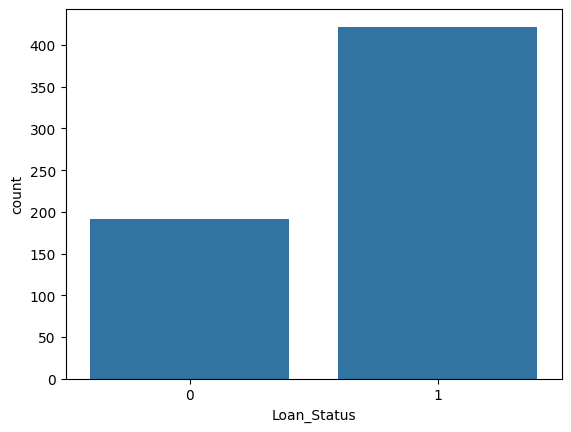

In [ ]:
#Exploratory Data Analysis(EDA)
print(df.isnull().sum())
print(df.describe())
sns.countplot(x='Loan_Status', data=df)
plt.show()


In [ ]:
#Data Preprocessing
imputer = SimpleImputer(strategy='mean')
df['LoanAmount'] = imputer.fit_transform(df[['LoanAmount']])
df['Loan_Amount_Term'] = imputer.fit_transform(df[['Loan_Amount_Term']])
df['Credit_History'] = imputer.fit_transform(df[['Credit_History']])
label_encoder = LabelEncoder()
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])
scaler = StandardScaler()
df['LoanAmount'] = scaler.fit_transform(df[['LoanAmount']])
df['ApplicantIncome'] = scaler.fit_transform(df[['ApplicantIncome']])
df['CoapplicantIncome'] = scaler.fit_transform(df[['CoapplicantIncome']])


In [ ]:
#Splitting the Dataset
X = df.drop(columns=['Loan_Status'])
y = df['Loan_Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
# Initialize the model
rf_model = RandomForestClassifier(random_state=42)


In [ ]:
# Initialize the model
X = df.drop(columns=['Loan_Status', 'Loan_ID'])  # Drop 'Loan_ID' as it's not a relevant feature
y = df['Loan_Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Model Selection and Train the model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
# Model Evaluation
y_pred = rf_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.772972972972973
Confusion Matrix:
 [[ 32  33]
 [  9 111]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.49      0.60        65
           1       0.77      0.93      0.84       120

    accuracy                           0.77       185
   macro avg       0.78      0.71      0.72       185
weighted avg       0.77      0.77      0.76       185



In [ ]:
# Hyperparameter Tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))
print("Classification Report:\n", classification_report(y_test, y_pred_best))


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 0.7837837837837838
Confusion Matrix:
 [[ 27  38]
 [  2 118]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.42      0.57        65
           1       0.76      0.98      0.86       120

    accuracy                           0.78       185
   macro avg       0.84      0.70      0.71       185
weighted avg       0.82      0.78      0.76       185

